In [1]:
import pandas as pd

df = pd.read_csv('data/uber.csv') # load the dataset

# shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

df.info() # Display column names and data types
df.head() # Display first 5 rows of the dataset



Dataset shape: (200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df[df['dropoff_latitude'].isnull() | df['dropoff_longitude'].isnull()]
# Display rows with missing dropoff latitude or longitude
# Check for missing values
df.isnull().sum()
# Display rows with missing values
# Drop rows with missing essential data
df_clean = df.dropna(subset=['dropoff_latitude', 'dropoff_longitude'])

# Confirm again
df_clean.isnull().sum()



Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

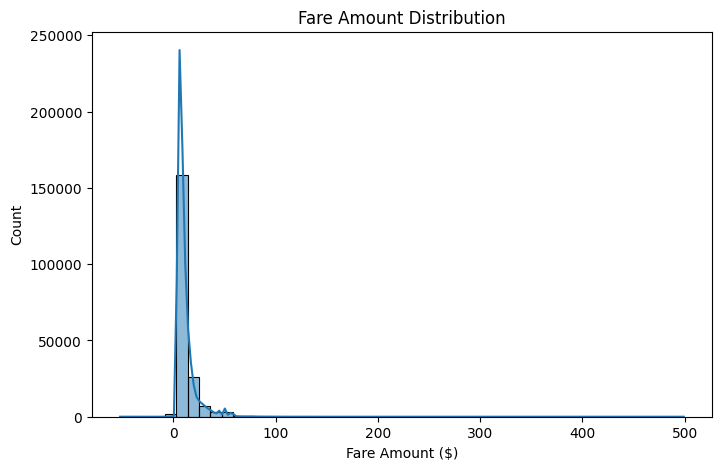

In [5]:
# Descriptive stats
df_clean.describe()

# Check fare values visually
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of fares
plt.figure(figsize=(8,5))
sns.histplot(df_clean['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Count")
plt.show()


In [10]:
# Convert pickup_datetime to datetime format
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])

# Extract time features
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['weekday'] = df_clean['pickup_datetime'].dt.dayofweek  # 0=Monday

# Define peak hours (7–9 AM and 4–7 PM)
def is_peak(hour):
    return 'Peak' if (7 <= hour <= 9 or 16 <= hour <= 19) else 'Off-Peak'

df_clean['peak_indicator'] = df_clean['hour'].apply(is_peak)

# Show updated data
df_clean[['pickup_datetime', 'hour', 'weekday', 'peak_indicator']].head()


,pickup_datetime,hour,weekday,peak_indicator
0,2015-05-07 19:52:06+00:00,19,3,Peak
1,2009-07-17 20:04:56+00:00,20,4,Off-Peak
2,2009-08-24 21:45:00+00:00,21,0,Off-Peak
3,2009-06-26 08:22:21+00:00,8,4,Peak
4,2014-08-28 17:47:00+00:00,17,3,Peak


In [13]:
# Save cleaned and enhanced data
df_clean.to_csv('data/uber_enhanced.csv', index=False)

import os

# Check if the file exists
file_path = 'data/uber_enhanced.csv'

if os.path.exists(file_path):
    print(f"✅ File saved successfully: {file_path}")
else:
    print("❌ File not found. Please check the path.")




✅ File saved successfully: data/uber_enhanced.csv


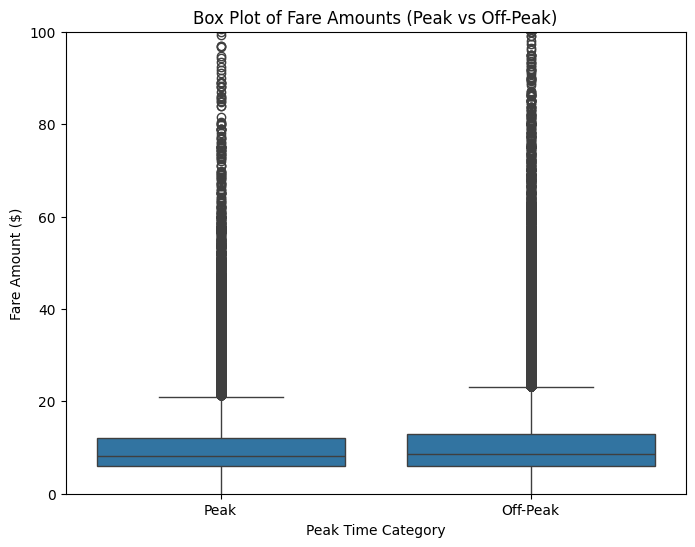

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='peak_indicator', y='fare_amount', data=df_clean)
plt.title("Box Plot of Fare Amounts (Peak vs Off-Peak)")
plt.xlabel("Peak Time Category")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, 100)  # Optional: limit to focus on normal range
plt.show()
